# RGB a YCbCr

In [4]:
import numpy as np

def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

In [6]:
!gdown 1rQ4TPQ83wUS3VVNN_fVyI0A3lZVRp-hB

Downloading...
From: https://drive.google.com/uc?id=1rQ4TPQ83wUS3VVNN_fVyI0A3lZVRp-hB
To: /content/manzana.jpg
100% 352k/352k [00:00<00:00, 75.0MB/s]


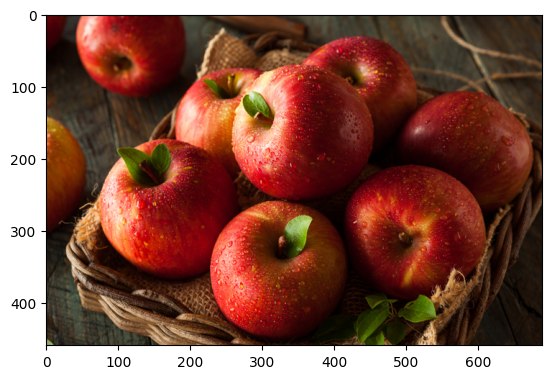

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
img = imread('manzana.jpg')
imshow(img)

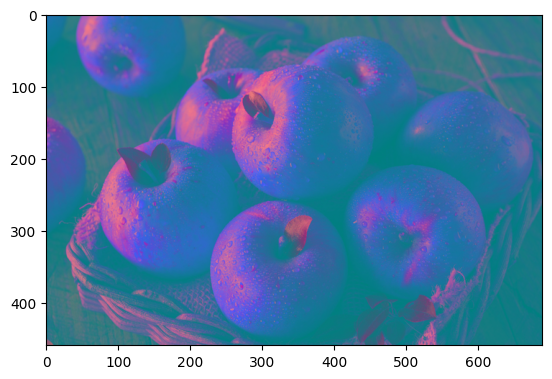

In [8]:
img = rgb2ycbcr(img)
imshow(img)

# DTC

In [9]:
import numpy as np
from scipy.fftpack import dct

def dct2D(x):
	tmp = dct(x, type=2 ,norm='ortho').transpose()
	return dct(tmp, type=2 ,norm='ortho').transpose()

print(dct2D([
	     [-64., -68., -71., -72., -80., -81., -81., -85.],
	     [-67., -70., -75., -76., -80., -79., -76., -75.],
	     [-61., -68., -75., -75., -79., -81., -80., -74.],
	     [-60., -67., -65., -65., -66., -63., -63., -64.],
	     [-57., -67., -58., -65., -59., -54., -40., -40.],
	     [-45., -36., -26., -23., -21., -17., -18., -13.],
	     [-33., -20., -20., -4., -6., 2., 0., 0.],
	     [-21., -10., -3., 6., 9., 14., 13., 9.]
	    ]))

[[-3.76125000e+02 -2.34724344e+01  1.04757174e+00 -2.48801657e+00
  -3.75000000e-01  4.09749865e+00  2.42576705e-01 -2.66975698e+00]
 [-2.24526227e+02  5.27173685e+01  1.99418270e+01  3.40910705e+00
   5.07274545e+00  2.91510641e+00  6.03999408e-01  2.28302459e+00]
 [ 6.77462913e+01  3.33934548e+00 -1.39915629e+01 -3.67837849e-01
  -2.83928811e+00 -1.89853269e+00 -4.72747564e+00 -6.22715608e+00]
 [ 2.32780153e+00 -8.68462985e+00 -1.53741672e+00 -3.84155608e+00
  -2.58324197e+00  1.14448580e+00  1.40637669e+00  1.93766289e+00]
 [-8.37500000e+00  1.23748170e+00  1.94823763e+00  3.35654889e+00
  -2.12500000e+00  4.90166451e+00  1.76369503e+00  5.38408801e+00]
 [ 4.52639330e+00  7.29241466e+00 -7.44185045e+00  1.93737902e+00
   1.29134140e+00 -7.53375342e-01 -1.51029974e+00 -5.96495993e+00]
 [ 6.43981873e+00  6.81942522e+00 -3.22747564e+00 -2.60436146e+00
   1.31137067e+00 -2.11567964e+00  1.74156294e+00  9.71189263e-01]
 [-1.58273126e+01  7.59178113e-02  9.31408273e+00  8.65223677e-01
   

# Ejemplo:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,interactive,interact_manual

# skimage image processing library

In [11]:
from skimage import data
from skimage.color import rgb2gray

In [12]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "astro":rgb2gray(img_as_float(data.astronaut())),
        "camera":data.camera(),
        "coin": data.coins(),
        "clock":data.clock(),
        "blobs":data.binary_blobs(),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

# svd in python

Resultados de traducción
Usaremos la función svd de la biblioteca numpy.linalg para calcular svd de una matriz en python. La función svd devuelve U,s,V .


* U ha dejado vectores singulares en las columnas

* s es una matriz numpy de rango 1 con valores singulares

* V tiene vectores rectos singulares en las filas, equivalentes al álgebra lineal tradicional

In [13]:
from numpy.linalg import svd

In [14]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))

    return reconst_matrix,s

# Compress gray scale images

In [15]:
def compress_show_gray_images(img_name,k):
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [16]:
def compute_k_max(img_name):
  """
    utility function for calculating max value of the slider range
  """
  img = gray_images[img_name]
  m,n = img.shape
  return m*n/(m+n+1)

#set up the widgets
import ipywidgets as widgets

list_widget = widgets.Dropdown(options=list(gray_images.keys()))
int_slider_widget = widgets.IntSlider(min=1,max=compute_k_max('cat'))
def update_k_max(*args):
  img_name=list_widget.value
  int_slider_widget.max = compute_k_max(img_name)
list_widget.observe(update_k_max,'value')


In [20]:
interact(compress_show_gray_images,img_name=list_widget,k=int_slider_widget);

interactive(children=(Dropdown(description='img_name', index=1, options=('cat', 'astro', 'camera', 'coin', 'cl…

In [21]:
color_images = {
    "cat":img_as_float(data.chelsea()),
    "astro":img_as_float(data.astronaut()),
    "coffee":img_as_float(data.coffee())

}

# Compress color images

In [22]:
def compress_show_color_images_reshape(img_name,k):
    """
     compress and display the reconstructed color image using the reshape method
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
    image_reconst,_ = compress_svd(image_reshaped,k)
    image_reconst = image_reconst.reshape(original_shape)
    compression_ratio =100.0* (k*(original_shape[0] + 3*original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(image_reconst)

In [23]:
def compute_k_max_color_images(img_name):
  image = color_images[img_name]
  original_shape = image.shape
  return (original_shape[0]*original_shape[1]*original_shape[2])//(original_shape[0] + 3*original_shape[1] + 1)


list_widget = widgets.Dropdown(options=list(color_images.keys()))
int_slider_widget = widgets.IntSlider(min=1,max=compute_k_max_color_images('cat'))
def update_k_max_color(*args):
  img_name=list_widget.value
  int_slider_widget.max = compute_k_max_color_images(img_name)
list_widget.observe(update_k_max_color,'value')

In [24]:
interact(compress_show_color_images_reshape,img_name=list_widget,k=int_slider_widget);


interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…

# Layers method to compress color images

In [26]:
def compress_show_color_images_layer(img_name,k):
    """
     compress and display the reconstructed color image using the layer method
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]

    compression_ratio =100.0*3* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")

    plt.imshow(image_reconst)

In [27]:
def compute_k_max_color_images_layers(img_name):
  image = color_images[img_name]
  original_shape = image.shape
  return (original_shape[0]*original_shape[1]*original_shape[2])// (3*(original_shape[0] + original_shape[1] + 1))


list_widget = widgets.Dropdown(options=list(color_images.keys()))
int_slider_widget = widgets.IntSlider(min=1,max=compute_k_max_color_images_layers('cat'))
def update_k_max_color_layers(*args):
  img_name=list_widget.value
  int_slider_widget.max = compute_k_max_color_images_layers(img_name)
list_widget.observe(update_k_max_color_layers,'value')

In [29]:
interact(compress_show_color_images_layer,img_name=list_widget,k=int_slider_widget);


interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…